In [5]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
image = cv2.imread('test1.jpg')
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

In [7]:
def affine_2x3(mat2x2):
    return np.hstack([mat2x2, np.array([[0], [0]])])

def rotation_matrix(degrees):
    rad = math.radians(degrees)
    cos = math.cos(rad)
    sin = math.sin(rad)
    return np.array([[cos, -sin], [sin, cos]])

def scaling_matrix(sx, sy):
    return np.array([[sx, 0], [0, sy]])

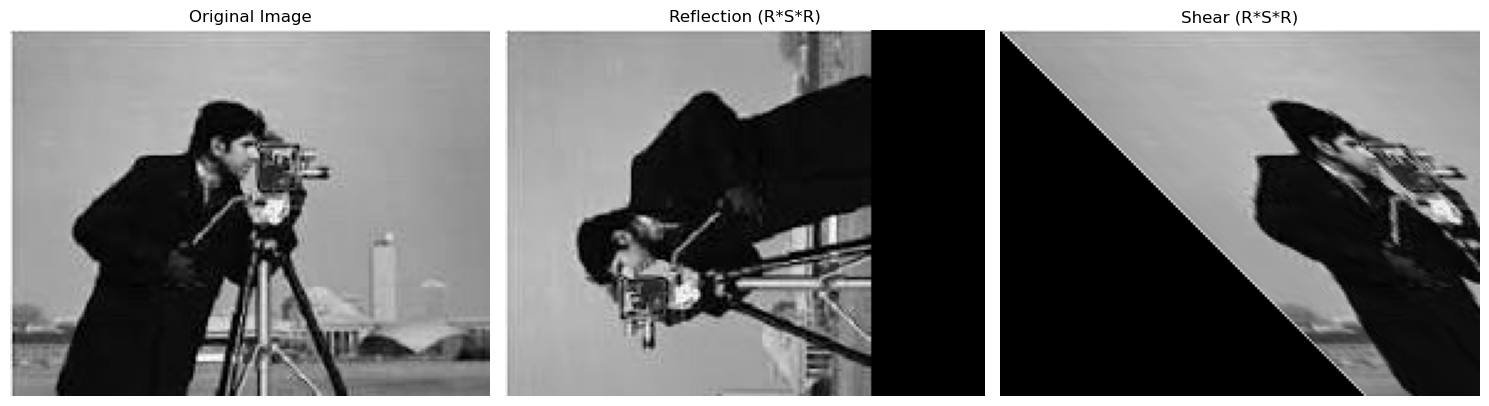

In [8]:
R1 = rotation_matrix(-45)
S = scaling_matrix(1, -1)
R2 = rotation_matrix(45)
reflection_mat = R2 @ S @ R1
affine_reflection = affine_2x3(reflection_mat)


reflected_img = cv2.warpAffine(image, affine_reflection, (w, h))


R1 = rotation_matrix(-58.3)
S = scaling_matrix(1.618, 0.618)
R2 = rotation_matrix(31.7)
shear_mat = R2 @ S @ R1
affine_shear = affine_2x3(shear_mat)

sheared_img = cv2.warpAffine(image, affine_shear, (w, h))

titles = ['Original Image', 'Reflection (R*S*R)', 'Shear (R*S*R)']
images = [image, reflected_img, sheared_img]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()